<div class='bar_title'></div>

*Data Driven Decisions in Practice (D3IP): Urban Analytics*

# 1. Data Handling in Python

Gunther Gust 
Chair for Enterprise AI <br>
Data Driven Decisions (D3) Group <br>
Center for Artificial Intelligence & Data Science <br>


<img src="images/d3.png" style="width:20%; float:left;" />

<img src="images/CAIDASlogo.png" style="width:20%; float:left;" />

## Content

- Learn how to work with datasets using Python, in particular:
- Loading data sets
- Manipulating data sets
- Visualizing data (aka plotting)


*Credits: Most of the material is taken from [Arribas-Bel, Geographic Data Science](https://darribas.org/gds_course/content/home.html#)*

## Dataset



In [5]:
import pandas as pd    # This is the workhorse of data munging in Python


In [6]:
db = pd.read_csv("liv_pop.csv", index_col="GeographyCode")

Let us stop for a minute to learn how we have read the file. Here are the main aspects to keep in mind:

* We are using the method `read_csv` from the `pandas` library, which we have imported with the alias `pd`.
* In this form, all that is required is to pass the path to the file we want to read _relative_ to the directory where _this_ notebook is located (which in this case in the same folder).
* The argument `index_col` is not strictly necessary but allows us to choose one of the columns as the index of the table. More on indices below.
* We are using `read_csv` because the file we want to read is in the `csv` format. However, `pandas` allows for many more formats to be read and write. A full list of formats supported may be found [here](https://pandas.pydata.org/docs/user_guide/io.html).
* To ensure we can access the data we have read, we store it in an _object_ that we call `db`. We will see more on what we can do with it below but, for now, just keep in mind that allows us to save the result of `read_csv`.


Instead of reading the file from disk, we can read it also directly off the web:

```python
db = pd.read_csv("https://raw.githubusercontent.com/GuntherGust/sc_gdsa_data/main/liv_pop.csv",
                 index_col='GeographyCode')
```


In [7]:
db

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
GeographyCode,,,,,
E01006512,910,106,840,24,0
E01006513,2225,61,595,53,7
E01006514,1786,63,193,61,5
E01006515,974,29,185,18,2
E01006518,1531,69,73,19,4
...,...,...,...,...,...
E01033764,2106,32,49,15,0
E01033765,1277,21,33,17,3
E01033766,1028,12,20,8,7


We will be exploring some demographic characteristics in Liverpool. To do that, we will use a dataset that contains population counts, split by ethnic origin. These counts are aggregated at the [Lower Layer Super Output Area](http://www.ons.gov.uk/methodology/geography/ukgeographies/censusgeography#output-area-oa) (LSOA from now on). LSOAs are an official Census geography defined by the Office of National Statistics. You can think of them, more or less, as neighbourhoods. Many data products (Census, deprivation indices, etc.) use LSOAs as one of their main geographies.

What we have at our fingertips is a table that summarizes, for each of the LSOAs in Liverpool, how many people live in each, by the region of the world where they were born.


## Manipulating data sets


### Understanding Structure and Content

In [8]:
db

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
GeographyCode,,,,,
E01006512,910,106,840,24,0
E01006513,2225,61,595,53,7
E01006514,1786,63,193,61,5
E01006515,974,29,185,18,2
E01006518,1531,69,73,19,4
...,...,...,...,...,...
E01033764,2106,32,49,15,0
E01033765,1277,21,33,17,3
E01033766,1028,12,20,8,7



### Inspect

Inspecting what it looks like. We can check the top (bottom) X lines of the table by passing X to the method `head` (`tail`). For example, for the top/bottom five lines:

Note the printing is cut to keep a nice and compact view, but enough to see its structure. Since they represent a table of data, `DataFrame` objects have two dimensions: rows and columns. Each of these is automatically assigned a name in what we will call its *index*. When printing, the index of each dimension is rendered in bold, as opposed to the standard rendering for the content. In the example above, we can see how the column index is automatically picked up from the `.csv` file's column names. For rows, we have specified when reading the file we wanted the column `GeographyCode`, so that is used. If we hadn't specified any, `pandas` will automatically generate a sequence starting in `0` and going all the way to the number of rows minus one. This is the standard structure of a `DataFrame` object, so we will come to it over and over. Importantly, even when we move to spatial data, our datasets will have a similar structure.

One final feature that is worth mentioning about these tables is that they can hold columns with different types of data. In our example, this is not used as we have counts (or `int`, for integer, types) for each column. But it is useful to keep in mind we can combine this with columns that hold other type of data such as categories, text (`str`, for string), dates or, as we will see later in the course, geographic features.

In [9]:
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
GeographyCode,,,,,
E01006512,910,106,840,24,0
E01006513,2225,61,595,53,7
E01006514,1786,63,193,61,5
E01006515,974,29,185,18,2
E01006518,1531,69,73,19,4


In [10]:
db.tail()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
GeographyCode,,,,,
E01033764,2106,32,49,15,0
E01033765,1277,21,33,17,3
E01033766,1028,12,20,8,7
E01033767,1003,29,29,5,1
E01033768,1016,69,111,21,6


Or getting an overview of the table:

In [11]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, E01006512 to E01033768
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Europe                          298 non-null    int64
 1   Africa                          298 non-null    int64
 2   Middle East and Asia            298 non-null    int64
 3   The Americas and the Caribbean  298 non-null    int64
 4   Antarctica and Oceania          298 non-null    int64
dtypes: int64(5)
memory usage: 14.0+ KB


## Calculate summarizing statistics

Summary of variable (columns) *values* in the table:

In [12]:
db.describe()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
count,298.00000,298.000000,298.000000,298.000000,298.000000
mean,1462.38255,29.818792,62.909396,8.087248,1.949664
std,248.67329,51.606065,102.519614,9.397638,2.168216
min,731.00000,0.000000,1.000000,0.000000,0.000000
25%,1331.25000,7.000000,16.000000,2.000000,0.000000
50%,1446.00000,14.000000,33.500000,5.000000,1.000000
75%,1579.75000,30.000000,62.750000,10.000000,3.000000
max,2551.00000,484.000000,840.000000,61.000000,11.000000


Note how the output is also a `DataFrame` object, so you can do with it the same things you would with the original table (e.g. writing it to a file).

In this case, the summary might be better presented if the table is "transposed":

In [13]:
db.describe().T

,count,mean,std,min,25%,50%,75%,max
Europe,298.0,1462.382550,248.673290,731.0,1331.25,1446.0,1579.75,2551.0
Africa,298.0,29.818792,51.606065,0.0,7.00,14.0,30.00,484.0
Middle East and Asia,298.0,62.909396,102.519614,1.0,16.00,33.5,62.75,840.0
The Americas and the Caribbean,298.0,8.087248,9.397638,0.0,2.00,5.0,10.00,61.0
Antarctica and Oceania,298.0,1.949664,2.168216,0.0,0.00,1.0,3.00,11.0


Equally, common descriptive statistics are also available:

In [14]:
# Obtain minimum values for each table
db.min()

Europe                            731
Africa                              0
Middle East and Asia                1
The Americas and the Caribbean      0
Antarctica and Oceania              0
dtype: int64

In [15]:
# Obtain minimum value for the column `Europe`
db['Europe'].min()

731

Note here how we have restricted the calculation of the maximum value to one column only.

Similarly, we can restrict the calculations to a single row:

In [16]:
# Obtain standard deviation for the row `E01006512`,
# which represents a particular LSOA
db.loc['E01006512', :].std()

457.8842648530303


### Create new columns

We can generate new variables by applying operations on existing ones. For example, we can calculate the total population by area. Here is a couple of ways to do it:

In [17]:
# Longer, hardcoded
total = db['Europe'] + db['Africa'] + db['Middle East and Asia'] + \
        db['The Americas and the Caribbean'] + db['Antarctica and Oceania']
# Print the top of the variable
total.head()

GeographyCode
E01006512    1880
E01006513    2941
E01006514    2108
E01006515    1208
E01006518    1696
dtype: int64

In [18]:
# One shot
total = db.sum(axis=1)
# Print the top of the variable
total.head()

GeographyCode
E01006512    1880
E01006513    2941
E01006514    2108
E01006515    1208
E01006518    1696
dtype: int64

Note how we are using the command `sum`, just like we did with `max` or `min` before but, in this case, we are not applying it over columns (e.g. the max of each column), but over rows, so we get the total sum of populations by areas.

If we want to have the total population by ethnicity, we can sum over the rows by setting the `axis` parameter to zero:

In [19]:
db.sum(axis = 0)

Europe                            435790
Africa                              8886
Middle East and Asia               18747
The Americas and the Caribbean      2410
Antarctica and Oceania               581
dtype: int64

Back to the row-wise population counts. Once we have created the variable, we can make it part of the table:

In [20]:
db['Total'] = total
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880
E01006513,2225,61,595,53,7,2941
E01006514,1786,63,193,61,5,2108
E01006515,974,29,185,18,2,1208
E01006518,1531,69,73,19,4,1696


## Generating new variables (columns)

A different spin on this is assigning new values: we can generate new variables with scalars, and modify those:

In [21]:
# New variable with all ones
db['ones'] = 1
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total,ones
GeographyCode,,,,,,,
E01006512,910,106,840,24,0,1880,1
E01006513,2225,61,595,53,7,2941,1
E01006514,1786,63,193,61,5,2108,1
E01006515,974,29,185,18,2,1208,1
E01006518,1531,69,73,19,4,1696,1


And we can modify specific values too:

In [22]:
db.loc['E01006512', 'ones'] = 3
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total,ones
GeographyCode,,,,,,,
E01006512,910,106,840,24,0,1880,3
E01006513,2225,61,595,53,7,2941,1
E01006514,1786,63,193,61,5,2108,1
E01006515,974,29,185,18,2,1208,1
E01006518,1531,69,73,19,4,1696,1


### Delete columns

Permanently deleting variables is also within reach of one command:

In [23]:
del db['ones']
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880
E01006513,2225,61,595,53,7,2941
E01006514,1786,63,193,61,5,2108
E01006515,974,29,185,18,2,1208
E01006518,1531,69,73,19,4,1696


### Index-based queries

Here we explore how we can subset parts of a `DataFrame` if we know exactly which bits we want. For example, if we want to extract the total and European population of the first four areas in the table, we use `loc` with lists:

In [24]:
eu_tot_first4 = db.loc[['E01006512', 'E01006513', 'E01006514', 'E01006515'], \
                      ['Total', 'Europe']]
eu_tot_first4

,Total,Europe
GeographyCode,,
E01006512,1880,910
E01006513,2941,2225
E01006514,2108,1786
E01006515,1208,974


Note that we use squared brackets (`[]`) to delineate the index of the items we want to subset. In Python, this sequence of items is called a list. Hence we can see how we can create a list with the names (index IDs) along each of the two dimensions of a `DataFrame` (rows and columns), and `loc` will return a subset of the original table *only* with the elements queried for.


An alternative to list-based queries is what is called "range-based" queries. These work on the indices of the table but, instead of requiring the ID of each item we want to retrieve, the operate by requiring only two IDs: the first and last element in a *range* of items. Range queries are expressed with a colon (`:`). For example:

In [25]:
range_qry = db.loc["E01006514":"E01006518", "Europe":"Antarctica and Oceania"]
range_qry

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
GeographyCode,,,,,
E01006514,1786,63,193,61,5
E01006515,974,29,185,18,2
E01006518,1531,69,73,19,4


We see how the range query picks up *all* the elements in between the two IDs specificed. Note that, for this to work, the first ID in the range needs to be placed *before* the second one in the table's index.

Once we know about list and range based queries, we can combine them both! For example, we can specify a range of rows and a list of columns:

In [26]:
range_list_qry = db.loc["E01006514":"E01006518", ["Europe", "Total"]]
range_list_qry

,Europe,Total
GeographyCode,,
E01006514,1786,2108
E01006515,974,1208
E01006518,1531,1696


### Condition-based queries


However, sometimes, we do not know exactly which observations we want, but we do know what conditions they need to satisfy (e.g. areas with more than 2,500 inhabitants). For these cases, `DataFrames` support selection based on conditions. Let us see a few examples. Suppose we want to select...


Select areas with more than 2,500 people in Total:

In [27]:
m5k = db.loc[db['Total'] > 2500, : ]
m5k

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006513,2225,61,595,53,7,2941
E01006747,2551,163,812,24,2,3552
E01006751,1843,139,568,21,1,2572


*... areas where there are no more than 750 Europeans*:

In [28]:
nm5ke = db.loc[db['Europe'] < 750, :]
nm5ke

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01033757,731,39,223,29,3,1025


*... areas with exactly ten person from Antarctica and Oceania*:

In [29]:
    oneOA = db.loc[db['Antarctica and Oceania'] == 10, :]
oneOA

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006679,1353,484,354,31,10,2232


**Pro-tip**: these queries can grow in sophistication with almost no limits. For example, here is a case where we want to find out the areas where European population is smaller than 50%:

In [30]:
eu_lth = db.loc[(db['Europe'] * 100 / db['Total']) < 50, :]
eu_lth

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880


## Alternative: the `query()` method

All the condition-based queries above are expressed using the `loc` operator. This is a powerful way and, since it shares syntax with index-based queries, it is also easier to remember. However, sometimes querying using `loc` involves a lot of quotation marks, parenthesis, etc. A more streamlined approach for condition-based queries of rows is provided by the `query` engine. Using this approach, we express everything in our query on a single string, or piece of text, and that is evaluated in the table at once. For example, we can run the same operation as in the first query above with the following syntax:

In [31]:
m5k_query = db.query("Total > 2500")
m5k_query

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006513,2225,61,595,53,7,2941
E01006747,2551,163,812,24,2,3552
E01006751,1843,139,568,21,1,2572


If we want to combine operations, this is also possible:

In [32]:
m5k_query2 = db.query("(Total > 2500) & (Total < 10000)")

Note that, in these cases, using `query` results in code that is much more streamlined and easier to read. However, `query` is not perfect and, particularly for more sophisticated queries, it does not afford the same degree of flexibility. For example, the last query we had using `loc` would not be possible using `query`.

If you are interested, more detail about `query` is available on the [official `pandas` documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#the-query-method).

### Combining queries

Now all of these queries can be combined with each other, for further flexibility. For example, imagine we want areas with more than 25 people from the Americas and Caribbean, but less than 1,500 in total:

In [33]:
ac25_l500 = db.loc[(db['The Americas and the Caribbean'] > 25) & \
                   (db['Total'] < 1500), :]
ac25_l500

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01033750,1235,53,129,26,5,1448
E01033752,1024,19,114,33,6,1196
E01033754,1262,37,112,32,9,1452
E01033756,886,31,221,42,5,1185
E01033757,731,39,223,29,3,1025
E01033761,1138,52,138,33,11,1372


### Sorting



Among the many operations `DataFrame` objects support, one of the most useful ones is to sort a table based on a given column. For example, imagine we want to sort the table by total population:

In [34]:
db_pop_sorted = db.sort_values('Total', ascending=False)
db_pop_sorted.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006747,2551,163,812,24,2,3552
E01006513,2225,61,595,53,7,2941
E01006751,1843,139,568,21,1,2572
E01006524,2235,36,125,24,11,2431
E01006787,2187,53,75,13,2,2330


## Obtaining help in the documentation

In [35]:
db.sort_values?

Signature:
db.sort_values(
    by: 'IndexLabel',
    *,
    axis: 'Axis' = 0,
    ascending: 'bool | list[bool] | tuple[bool, ...]' = True,
    inplace: 'bool' = False,
    kind: 'str' = 'quicksort',
    na_position: 'str' = 'last',
    ignore_index: 'bool' = False,
    key: 'ValueKeyFunc' = None,
) -> 'DataFrame | None'
Docstring:
Sort by the values along either axis.

Parameters
----------
by : str or list of str
    Name or list of names to sort by.

    - if `axis` is 0 or `'index'` then `by` may contain index
      levels and/or column labels.
    - if `axis` is 1 or `'columns'` then `by` may contain column
      levels and/or index labels.
axis : {0 or 'index', 1 or 'columns'}, default 0
     Axis to be sorted.
ascending : bool or list of bool, default True
     Sort ascending vs. descending. Specify list for multiple sort
     orders.  If this is a list of bools, must match the length of
     the by.
inplace : bool, default False
     If True, perform operation in-place.
kind : 

In [36]:
help(db.sort_values)

Help on method sort_values in module pandas.core.frame:

sort_values(by: 'IndexLabel', *, axis: 'Axis' = 0, ascending: 'bool | list[bool] | tuple[bool, ...]' = True, inplace: 'bool' = False, kind: 'str' = 'quicksort', na_position: 'str' = 'last', ignore_index: 'bool' = False, key: 'ValueKeyFunc' = None) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Sort by the values along either axis.
    
    Parameters
    ----------
    by : str or list of str
        Name or list of names to sort by.
    
        - if `axis` is 0 or `'index'` then `by` may contain index
          levels and/or column labels.
        - if `axis` is 1 or `'columns'` then `by` may contain column
          levels and/or index labels.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted.
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must match th

If you inspect the help of `db.sort_values`, you will find that you can pass more than one column to sort the table by. This allows you to do so-called hiearchical sorting: sort first based on one column, if equal then based on another column, etc.

## Visual exploration


The next step to continue exploring a dataset is to get a feel for what it looks like, visually. We have already learnt how to unconver and inspect specific parts of the data, to check for particular cases we might be intersted in. Now we will see how to plot the data to get a sense of the overall distribution of values. For that, we will be using the Python library [`seaborn`](http://stanford.edu/~mwaskom/software/seaborn/index.html).

In [39]:
import seaborn as sns  # This allows us to efficiently and beautifully plot

In [43]:
# This ensures visualizations are plotted inside the notebook
%matplotlib inline

## Histograms


One of the most common graphical devices to display the distribution of values in a variable is a histogram. Values are assigned into groups of equal intervals, and the groups are plotted as bars rising as high as the number of values into the group.

A histogram is easily created with the following command. In this case, let us have a look at the shape of the overall population:

<Axes: xlabel='Total', ylabel='Count'>

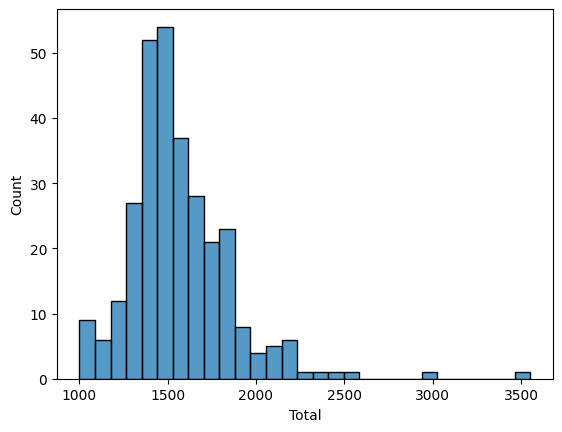

In [44]:
sns.histplot(db['Total'])

Note we are using `sns` instead of `pd`, as the function belongs to `seaborn` instead of `pandas`.

We can quickly see most of the areas contain somewhere between 1,200 and 1,700 people, approx. However, there are a few areas that have many more, even up to 3,500 people.

An additional feature to visualize the density of values is called `rug`, and adds a little tick for each value on the horizontal axis:

### Kernel Density Plots

Histograms are useful, but they are artificial in the sense that a continuous variable is made discrete by turning the values into discrete groups. An alternative is kernel density estimation (KDE), which produces an empirical density function:

<Axes: xlabel='Total', ylabel='Density'>

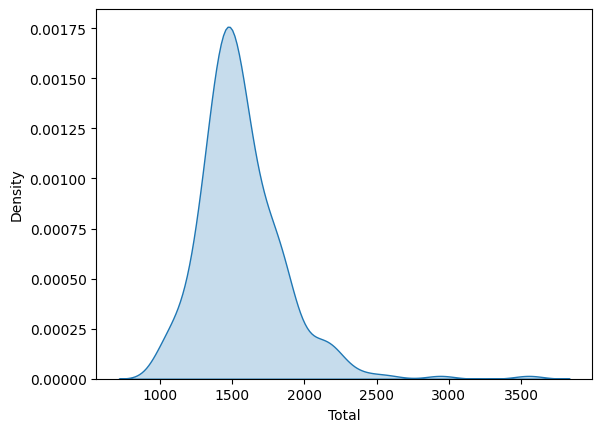

In [45]:
sns.kdeplot(db['Total'], fill = True )

### Line and bar plots

Another very common way of visually displaying a variable is with a line or a bar chart. For example, if we want to generate a line plot of the (sorted) total population by area:

<Axes: xlabel='GeographyCode'>

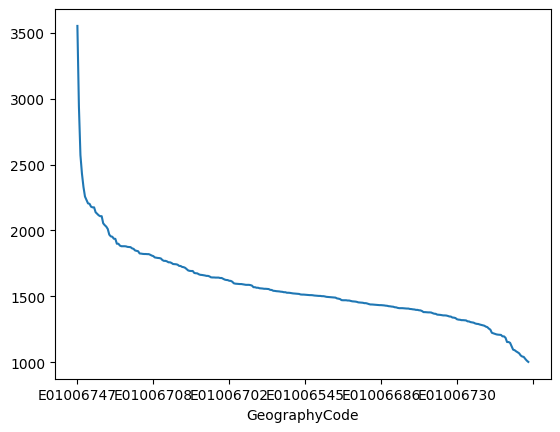

In [46]:
db['Total'].sort_values(ascending=False).plot()

<Axes: xlabel='GeographyCode'>

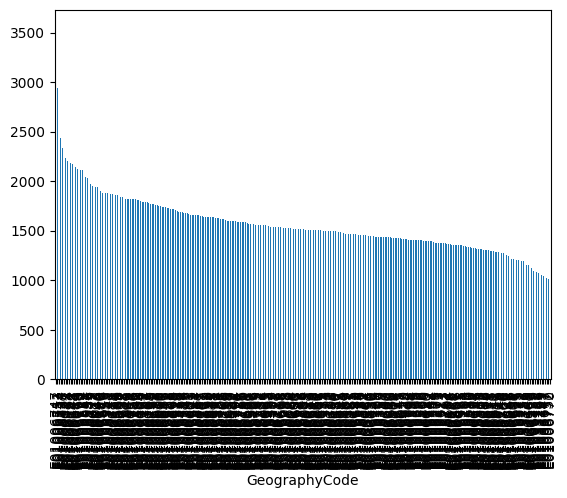

In [47]:
db['Total'].sort_values(ascending=False).plot.bar()

For a bar plot all we need to do is to change from `plot` to `plot.bar`. Since there are many neighbourhoods, let us plot only the ten largest ones (which we can retrieve with `head`):

<Axes: xlabel='GeographyCode'>

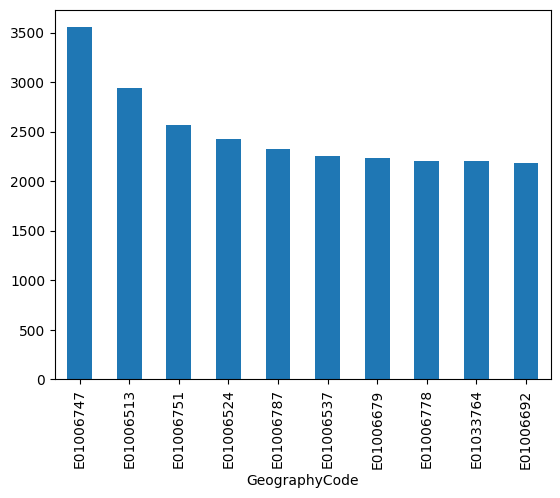

In [48]:
db['Total'].sort_values(ascending=False)\
.head(10).plot.bar()

We can turn the plot around by displaying the bars horizontally (see how it's just changing `bar` for `barh`). Let's display now the top 20 areas and, to make it more readable, let us expand the plot's height:

<Axes: ylabel='GeographyCode'>

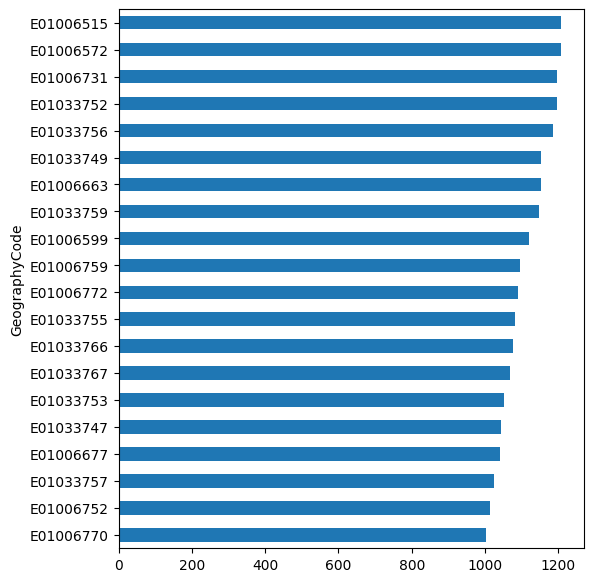

In [49]:
db['Total'].sort_values()\
               .head(20)\
               .plot.barh(figsize=(6, 7))

## Additional materials

There are many great free online resources for practicing data manipulation using Python and Pandas. For example:
* A great resource is the [Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas
* Another, slightly more advanced introduction to data manipulation in Python using pandas is Wes McKinney's "[Python for Data Analysis](https://wesmckinney.com/book/pandas-basics)"
* To explore further some of the visualization capabilities in at your fingertips, the Python library `seaborn` is an excellent choice. Its online [tutorial](https://seaborn.pydata.org/tutorial/introduction.html) is a fantastic place to start.


<img src="images/d3.png" style="width:50%; float:center;" />